In [1]:
%load_ext autoreload
%autoreload 2

## Visualize different simulation kernels.

In [2]:
import sys
sys.path.append('../scripts/')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from umap import UMAP

from sim_utils import sample_clusters, sample_endo, _ncells_to_indices

In [3]:
d_env = 5
n_individuals = 5
dirichlet_alpha = 6
n_cells = 500
random = np.random.default_rng(13223)

# cell indices for each individual
n_samples, individual_groups = _ncells_to_indices(n_individuals, n_cells)

Cluster-kernel; uniform cell-by-donor distribution

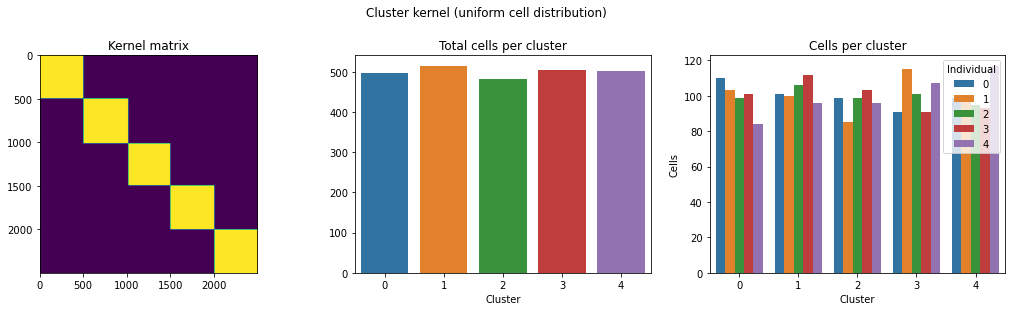

In [4]:
E = sample_clusters(
    n_clusters=d_env,
    n_individuals=n_individuals,
    n_cells=n_cells,
    random=random
)
order = np.argsort(np.where(E)[1])
K = E[order, :] @ E[order, :].T

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
axes[0].imshow(K)
sns.barplot(x=list(range(d_env)), y=E.sum(0), ax=axes[1])

group_counts = list()
for group in individual_groups:
    group_counts.append(E[group, :].sum(0))

df = pd.DataFrame(group_counts).T.reset_index().melt(id_vars='index')
df.columns = ['Cluster', 'Individual', 'Cells']
sns.barplot(x='Cluster', y='Cells', hue='Individual', data=df, ax=axes[2])

axes[0].set(title='Kernel matrix')
axes[1].set(title='Total cells per cluster', xlabel='Cluster')
axes[2].set(title='Cells per cluster');
fig.suptitle('Cluster kernel (uniform cell distribution)', y=1.05);

Non-uniform cell-by-donor distribution

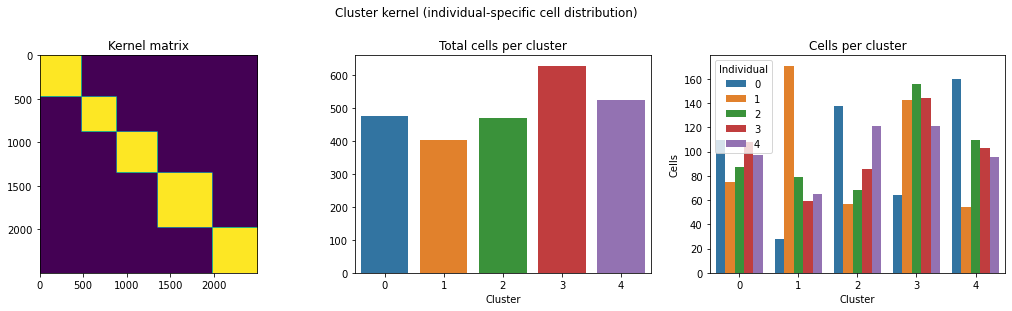

In [5]:
E = sample_clusters(
    n_clusters=d_env,
    n_individuals=n_individuals,
    n_cells=n_cells,
    random=random,
    dirichlet_alpha=dirichlet_alpha
)
order = np.argsort(np.where(E)[1])
K = E[order, :] @ E[order, :].T

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
axes[0].imshow(K)
sns.barplot(x=list(range(d_env)), y=E.sum(0), ax=axes[1])

group_counts = list()
for group in individual_groups:
    group_counts.append(E[group, :].sum(0))

df = pd.DataFrame(group_counts).T.reset_index().melt(id_vars='index')
df.columns = ['Cluster', 'Individual', 'Cells']
sns.barplot(x='Cluster', y='Cells', hue='Individual', data=df, ax=axes[2])

axes[0].set(title='Kernel matrix')
axes[1].set(title='Total cells per cluster', xlabel='Cluster')
axes[2].set(title='Cells per cluster')
fig.suptitle('Cluster kernel (individual-specific cell distribution)', y=1.05);

Endoderm PCs

In [6]:
E = sample_endo(
    d_env=d_env,
    n_individuals=n_individuals,
    n_cells=n_cells,
    random=random,
    respect_individuals=True
)

In [7]:
E.shape

(2500, 5)

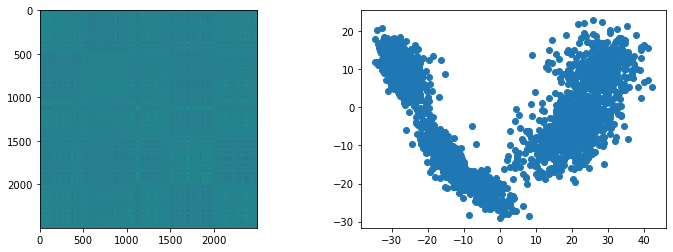

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(E@E.T)
axes[1].scatter(E[:, 0], E[:, 1])